WeatherPY

In [2]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import requests
import scipy.stats as st
from scipy.stats import linregress
import json
import time
import os
from datetime import datetime

# import the OpenWeatherMap API key
from api_keys import weather_api_key

# import ciiypy to determine the cities based on latitude and longitude
from citipy import citipy



Generate the Cities List by Using citipy Library

In [3]:
# empty list for holding the latitude and longitude combinations
lat_lngs = []

# empty list for holding the cities
cities = []

# range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# create a set of random latitude and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# identify the nearest city for each latitude and longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # if the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

# print the city count to confirm sufficient count
print(f"The number of cities in the list: {len(cities)}")

The number of cities in the list: 623


Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
from api_keys import weather_api_key
# set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# set the units for the temperature
units = "metric"

# create an empty list to hold the weather data for each city
city_data = []

# print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters
record_count = 1
set_count = 1

# loop through all the cities in the list to fetch weather data
for i, city in enumerate(cities):
        
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # create the endpoint URL
    city_url = f"{base_url}q={city}&appid={weather_api_key}&units={units}"

    # log the URL, record, and set numbers and the city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # add 1 to the record count
    record_count += 1

    # run an API request for each of the cities
    try:
        # parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # parse out latitude, longitude, maximum temperature, humidity, cloudiness, wind speed, country and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_country = city_weather["sys"]["country"]
        city_wind_speed = city_weather["wind"]["speed"]
        city_clouds = city_weather["clouds"]["all"]
        city_date = city_weather["dt"]

    # append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind_speed,
                          "Country": city_country,
                          "Date": city_date})
    
    # if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# indicate that data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | bosaso
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | atafu village
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | hasaki
Processing Record 11 of Set 1 | ust-nera
Processing Record 12 of Set 1 | barra de santo antonio
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | sitka
Processing Record 15 of Set 1 | uturoa
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | mil'kovo
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | minas de marcona
Processing Record 21 of Set 1 | kosh-agach
Processing Record 22 of Set 1 | vi

In [5]:
# convert the city data into a pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# show the record count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [6]:
# display the sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,17.65,77,40,10.29,PT,1707747506
1,Saint-Philippe,-21.3585,55.7679,28.77,86,60,5.10,RE,1707747506
2,Codrington,-38.2667,141.9667,14.44,92,0,2.67,AU,1707747507
3,Waitangi,-43.9535,-176.5597,12.68,87,52,0.89,NZ,1707747507
4,Port-Aux-Francais,-49.3500,70.2167,6.91,85,100,14.40,TF,1707747507


In [7]:
# export the city data into a CSV
city_data_df.to_csv("FinalOutPutData/WeatherPy_Database.csv", index_label="City_ID")

In [8]:
# read saved data
city_data_df = pd.read_csv("FinalOutPutData/WeatherPy_Database.csv", index_col="City_ID")

# display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Ribeira Grande,38.5167,-28.7000,17.65,77,40,10.29,PT,1707747506
1,Saint-Philippe,-21.3585,55.7679,28.77,86,60,5.10,RE,1707747506
2,Codrington,-38.2667,141.9667,14.44,92,0,2.67,AU,1707747507
3,Waitangi,-43.9535,-176.5597,12.68,87,52,0.89,NZ,1707747507
4,Port-Aux-Francais,-49.3500,70.2167,6.91,85,100,14.40,TF,1707747507


Create the Scatter Plots Requested

Latitude Vs. Temperature

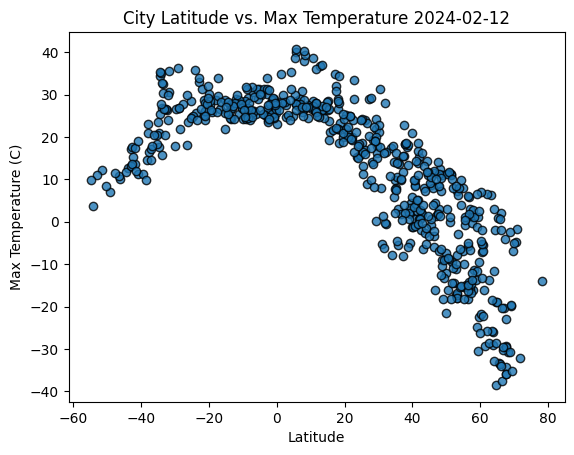

In [10]:
# scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# add title, labels and grid
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%Y-%m-%d')}")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

# save the figure
plt.savefig("Fig1.png")

# show the plot
plt.show()

Latitude vs. Humidity

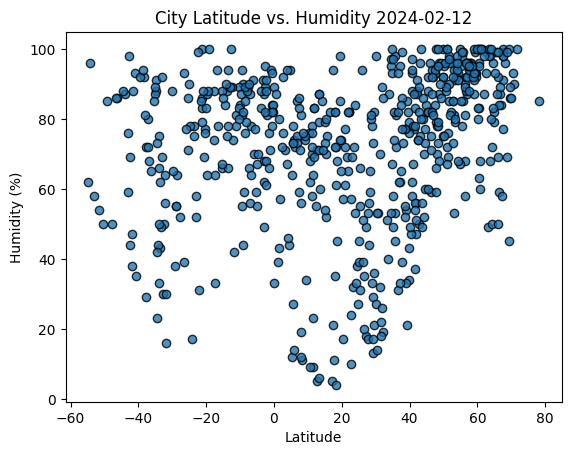

In [11]:
# scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# add title, labels and grid
plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('%Y-%m-%d')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# save the figure
plt.savefig("Fig2.png")

# show the plot
plt.show()

Latitude vs. Cloudiness

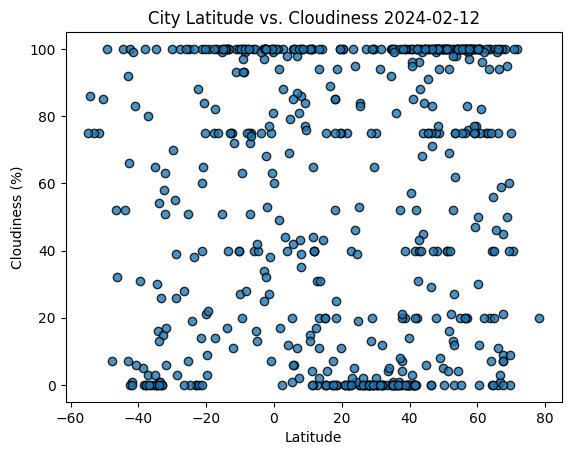

In [12]:
# scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# add title, labels and grid
plt.title(f"City Latitude vs. Cloudiness {datetime.now().strftime('%Y-%m-%d')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# save the figure
plt.savefig("Fig3.png")

# show the plot
plt.show()


Latitude vs. Wind Speed Plot

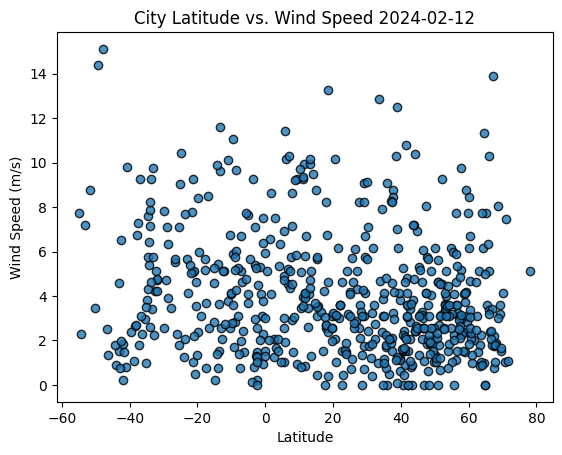

In [13]:
# scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# add title, labels
plt.title(f"City Latitude vs. Wind Speed {datetime.now().strftime('%Y-%m-%d')}")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# save the figure
plt.savefig("Fig4.png")

# show the plot
plt.show()


Requirement 2: Compute Linear Regression for Each Relationship

In [14]:
# define a function for linear regression
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.show()

In [15]:
# a new DataFrame for Northern Hemisphere
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Ribeira Grande,38.5167,-28.7000,17.65,77,40,10.29,PT,1707747506
5,Bosaso,11.2842,49.1816,26.59,70,4,3.95,SO,1707747508
9,Hasaki,35.7333,140.8333,2.94,45,0,1.70,JP,1707747508
10,Ust-Nera,64.5667,143.2000,-38.49,96,56,1.00,RU,1707747508
12,Longyearbyen,78.2186,15.6401,-14.09,85,20,5.14,SJ,1707747508


In [16]:
# a new DataFrame for Southern Hemisphere
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Saint-Philippe,-21.3585,55.7679,28.77,86,60,5.10,RE,1707747506
2,Codrington,-38.2667,141.9667,14.44,92,0,2.67,AU,1707747507
3,Waitangi,-43.9535,-176.5597,12.68,87,52,0.89,NZ,1707747507
4,Port-Aux-Francais,-49.3500,70.2167,6.91,85,100,14.40,TF,1707747507
6,Invercargill,-46.4000,168.3500,10.01,86,32,1.34,NZ,1707747508


Temperature vs. Latitude Linear Regression Plot

The correlation coefficient between latitude and max temperature is -0.86


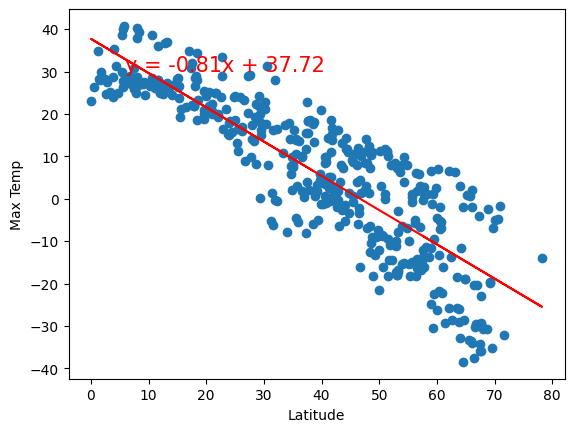

In [17]:
# linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# calculate the correlation coefficient
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation coefficient between latitude and max temperature is {correlation}")

# call the function
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The correlation coefficient between latitude and max temperature is 0.63


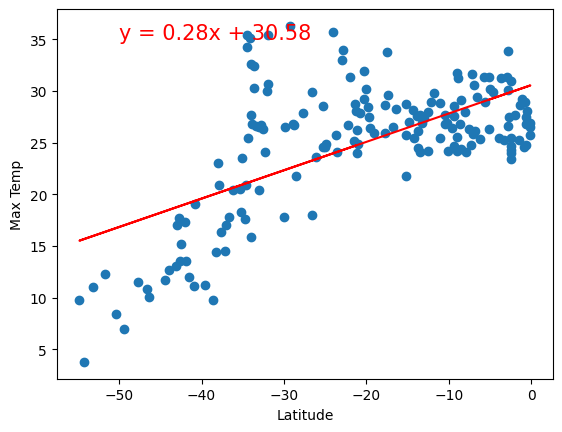

In [18]:
# linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# calculate the correlation coefficient
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation coefficient between latitude and max temperature is {correlation}")

# call the function
plot_linear_regression(x_values, y_values, 'Max Temp',(-50,35))


Discussion
The correlation coefficient in the northern hemisphere is stronger than in the southern hemisphere for this sample set of data. Latitude in the northern hemisphere can be considered a strong explanatory variable for max temperature. In the norther hemisphere, the max temperature increases as the latitude decreases.

The correlation coefficient in the southern hemisphere, at 0.63, still exhibits a relationship between latitude and max temperature. As the latitude increases, the temparature increases which is indicated by the positive slope of the regression line.

Humidity vs. Latitude

The correlation coefficient between latitude and humidity is 0.48


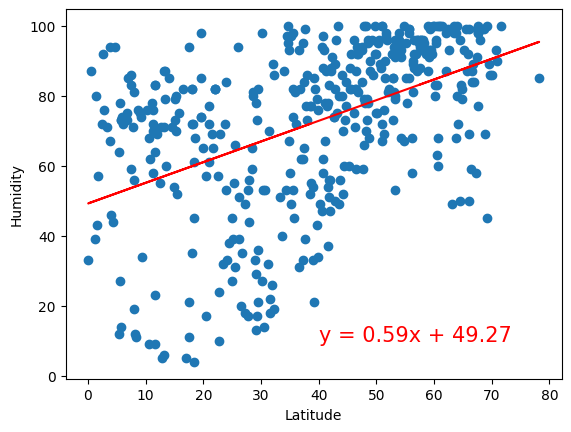

In [19]:
# linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# calculate the correlation coefficient
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation coefficient between latitude and humidity is {correlation}")

# call the function
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))


The correlation coefficient between latitude and humidity is 0.26


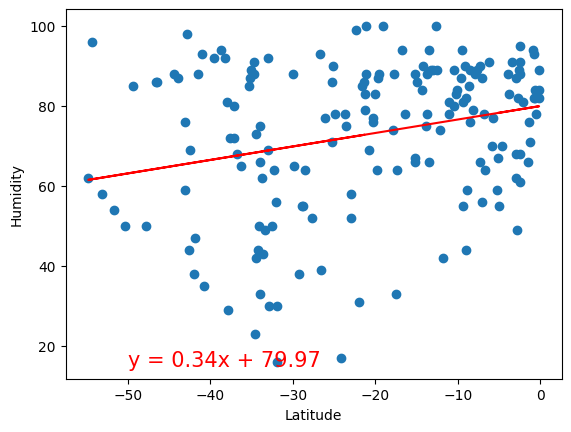

In [20]:
# linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# calculate the correlation coefficient
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation coefficient between latitude and humidity is {correlation}")

# call the function
plot_linear_regression(x_values, y_values, 'Humidity',(-50,15))

Discussion: Both the northern and southern hemisphere regression plots depict a positive relationship between latitude and humidity. The correlation coefficient is stronger in the northern than in the southern hemisphere. Latitude does not have a strong predictive quality for humidity.


Cloudiness vs. Lattitude Linear Regression Plot

The correlation coefficient between latitude and cloudiness is 0.19


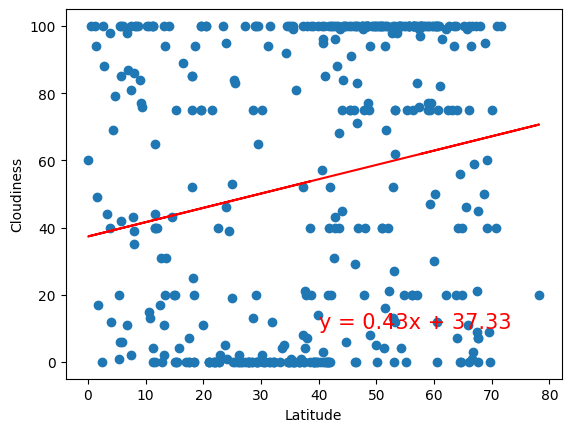

In [21]:
# linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# calculate the correlation coefficient
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation coefficient between latitude and cloudiness is {correlation}")

# call the function
plot_linear_regression(x_values, y_values, 'Cloudiness',(40,10))

The correlation coefficient between latitude and cloudiness is 0.35


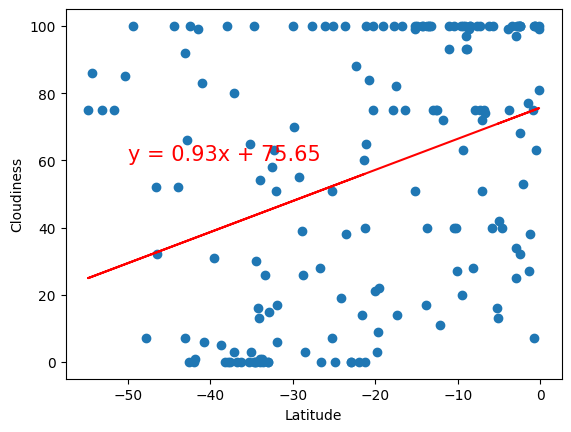

In [22]:
# linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# calculate the correlation coefficient
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation coefficient between latitude and cloudiness is {correlation}")

# call the function
plot_linear_regression(x_values, y_values, 'Cloudiness',(-50,60))

Discussion: Both the northern and southern hemisphere regression plots depict a positive relationship between latitude and cloudiness. The correlation coefficient is stronger in the southern than in the northern hemisphere. Latitude does not have a strong predictive quality for cloudiness.

Wind Speed vs. Lattitude Linear Regression Plot

The correlation coefficient between latitude and wind speed is -0.16


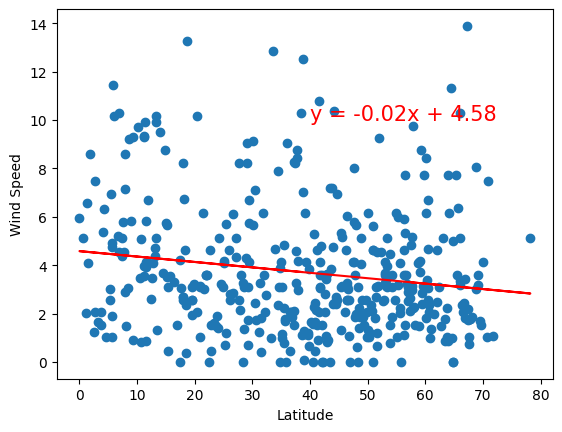

In [23]:
# linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# calculate the correlation coefficient
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation coefficient between latitude and wind speed is {correlation}")

# call the function
plot_linear_regression(x_values, y_values, 'Wind Speed',(40,10))

The correlation coefficient between latitude and wind speed is -0.13


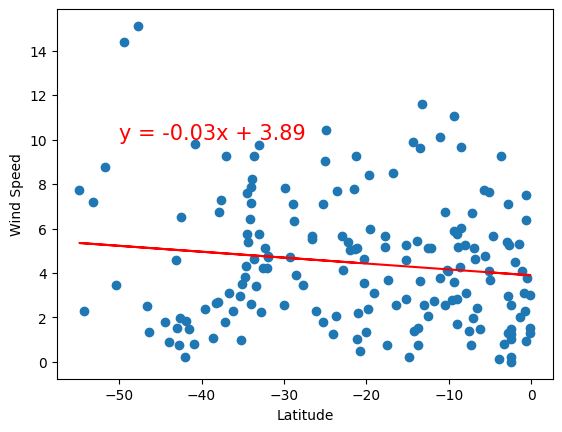

In [24]:
# linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# calculate the correlation coefficient
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation coefficient between latitude and wind speed is {correlation}")

# call the function
plot_linear_regression(x_values, y_values, 'Wind Speed',(-50,10))

Discussion: Latitude does not have a strong predictive quality for windspeed in this data set. Both the northern and southern hemisphere data have weak correlation coefficients.